<a href="https://colab.research.google.com/github/riken-emar/PVAclassifier/blob/main/corr%2Crandomforest20230315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://own-search-and-study.xyz/2019/10/05/shap-all-methods/

#https://masalabo.blog/2022/02/18/post-315/

#https://masalabo.blog/2022/02/10/post-274/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
df = pd.read_csv('./data/RFdataset20230314.csv', index_col=0)
#df = df.apply(stats.zscore, axis=1)
df

,Biodegradability,Solubility,SaponificationDeg,RigidityScore,Peak-gentle,Peak-sharp,Crystal,Viscosity4,CloudP,Denaturing_group,Including_N,Tg,DTA_thermalpeak,HeatDegSt,HeatDegEnd
1,1,10,10,0.052,0,2,9,3,8,1,0,5,269,257,443
2,1,10,7,0.045,1,0,4,2,3,1,0,5,301,282,444
3,1,9,10,0.276,2,0,8,4,9,1,0,7,263,256,451
4,1,7,7,0.020,1,0,4,7,3,1,0,6,305,281,446
5,0,9,7,0.905,1,0,1,3,0,3,1,10,217,214,448
6,1,8,10,0.322,1,0,5,8,9,1,0,8,252,135,421
7,1,10,7,0.753,1,0,1,3,3,3,1,9,235,126,430
8,1,9,6,0.029,2,0,4,2,0,1,0,5,298,108,440
9,0,2,5,0.207,2,0,2,3,0,1,0,4,295,114,442
10,0,9,9,8.676,1,0,4,4,3,2,1,8,298,112,438


In [ ]:
df_corr = df.corr()
df_corr=df_corr.fillna(0)
df_corr

,Biodegradability,Solubility,SaponificationDeg,RigidityScore,Peak-gentle,Peak-sharp,Crystal,Viscosity4,CloudP,Denaturing_group,Including_N,Tg,DTA_thermalpeak,HeatDegSt,HeatDegEnd
Biodegradability,1.000000,0.588067,0.260009,-0.354007,-0.085890,0.000000,0.335224,0.241209,0.296436,-0.215758,-0.230089,0.059161,-0.039964,0.224483,-0.237166
Solubility,0.588067,1.000000,0.483775,-0.019731,-0.147687,0.167849,0.194444,-0.215259,0.259957,0.330186,0.352117,0.506598,-0.051854,-0.054884,-0.217675
SaponificationDeg,0.260009,0.483775,1.000000,0.502093,-0.272092,0.411079,0.734692,0.354132,0.897107,-0.006448,0.065326,0.594076,-0.246309,0.115653,-0.152658
RigidityScore,-0.354007,-0.019731,0.502093,1.000000,-0.094891,0.266057,0.310171,0.302453,0.418243,0.045505,0.148948,0.419470,0.037996,0.041875,-0.000342
Peak-gentle,-0.085890,-0.147687,-0.272092,-0.094891,1.000000,-0.465786,-0.155692,-0.226165,-0.276805,-0.082362,-0.087833,-0.135501,0.070804,-0.246770,0.229324
Peak-sharp,0.000000,0.167849,0.411079,0.266057,-0.465786,1.000000,0.407660,-0.062432,0.519377,-0.212741,-0.226871,0.062500,0.095269,0.327630,0.076111
Crystal,0.335224,0.194444,0.734692,0.310171,-0.155692,0.407660,1.000000,0.282108,0.740283,-0.541116,-0.477073,-0.035257,0.078421,0.362267,0.177175
Viscosity4,0.241209,-0.215259,0.354132,0.302453,-0.226165,-0.062432,0.282108,1.000000,0.429569,-0.234193,-0.217374,0.263997,-0.315079,0.347092,-0.139373
CloudP,0.296436,0.259957,0.897107,0.418243,-0.276805,0.519377,0.740283,0.429569,1.000000,-0.213195,-0.153903,0.426294,-0.151512,0.254358,-0.142446
Denaturing_group,-0.215758,0.330186,-0.006448,0.045505,-0.082362,-0.212741,-0.541116,-0.234193,-0.213195,1.000000,0.937715,0.680770,-0.482531,-0.372547,-0.133558


In [ ]:
df_corr.to_csv("df_corr20230315.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
#from pyvis.network import Network

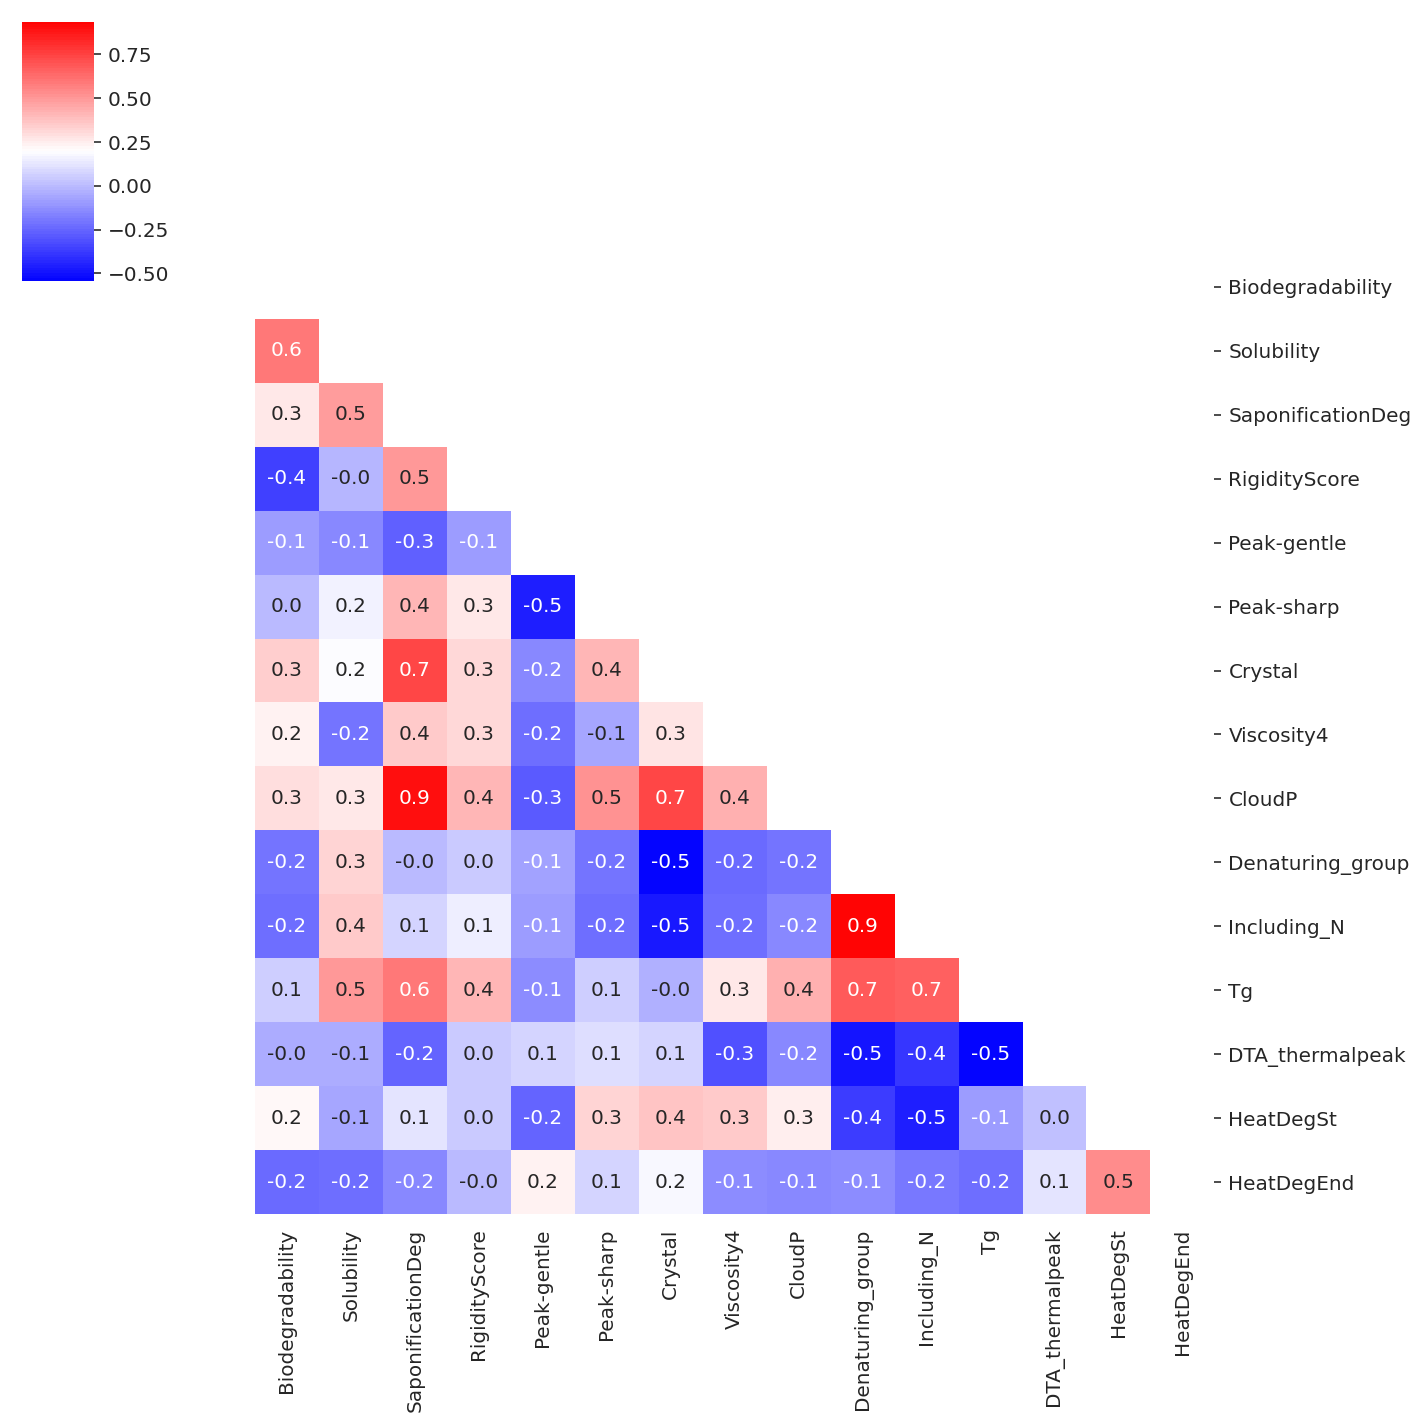

In [ ]:
# 右上の三角行列をマスク
mask_df = df_corr.mask(np.triu(np.ones(df_corr.shape)).astype(bool), None)
mask_df
sns.clustermap(mask_df, annot=True,fmt=".1f",cmap=sns.color_palette('bwr', 100), col_cluster=False, row_cluster=False)

In [ ]:
edges = mask_df.stack().reset_index().rename(columns={"level_0":"source", "level_1":"target", 0:"weight",})
threshold =0.4
edges_lists = edges.loc[abs(edges['weight'])> threshold] # 該当のノードのみ出したい場合コメントアウト外す
edges_lists

,source,target,weight
0,Solubility,Biodegradability,0.588067
2,SaponificationDeg,Solubility,0.483775
5,RigidityScore,SaponificationDeg,0.502093
12,Peak-sharp,SaponificationDeg,0.411079
14,Peak-sharp,Peak-gentle,-0.465786
17,Crystal,SaponificationDeg,0.734692
20,Crystal,Peak-sharp,0.407660
30,CloudP,SaponificationDeg,0.897107
31,CloudP,RigidityScore,0.418243
33,CloudP,Peak-sharp,0.519377


In [ ]:
edges_lists.to_csv("edges_lists20230315.csv")

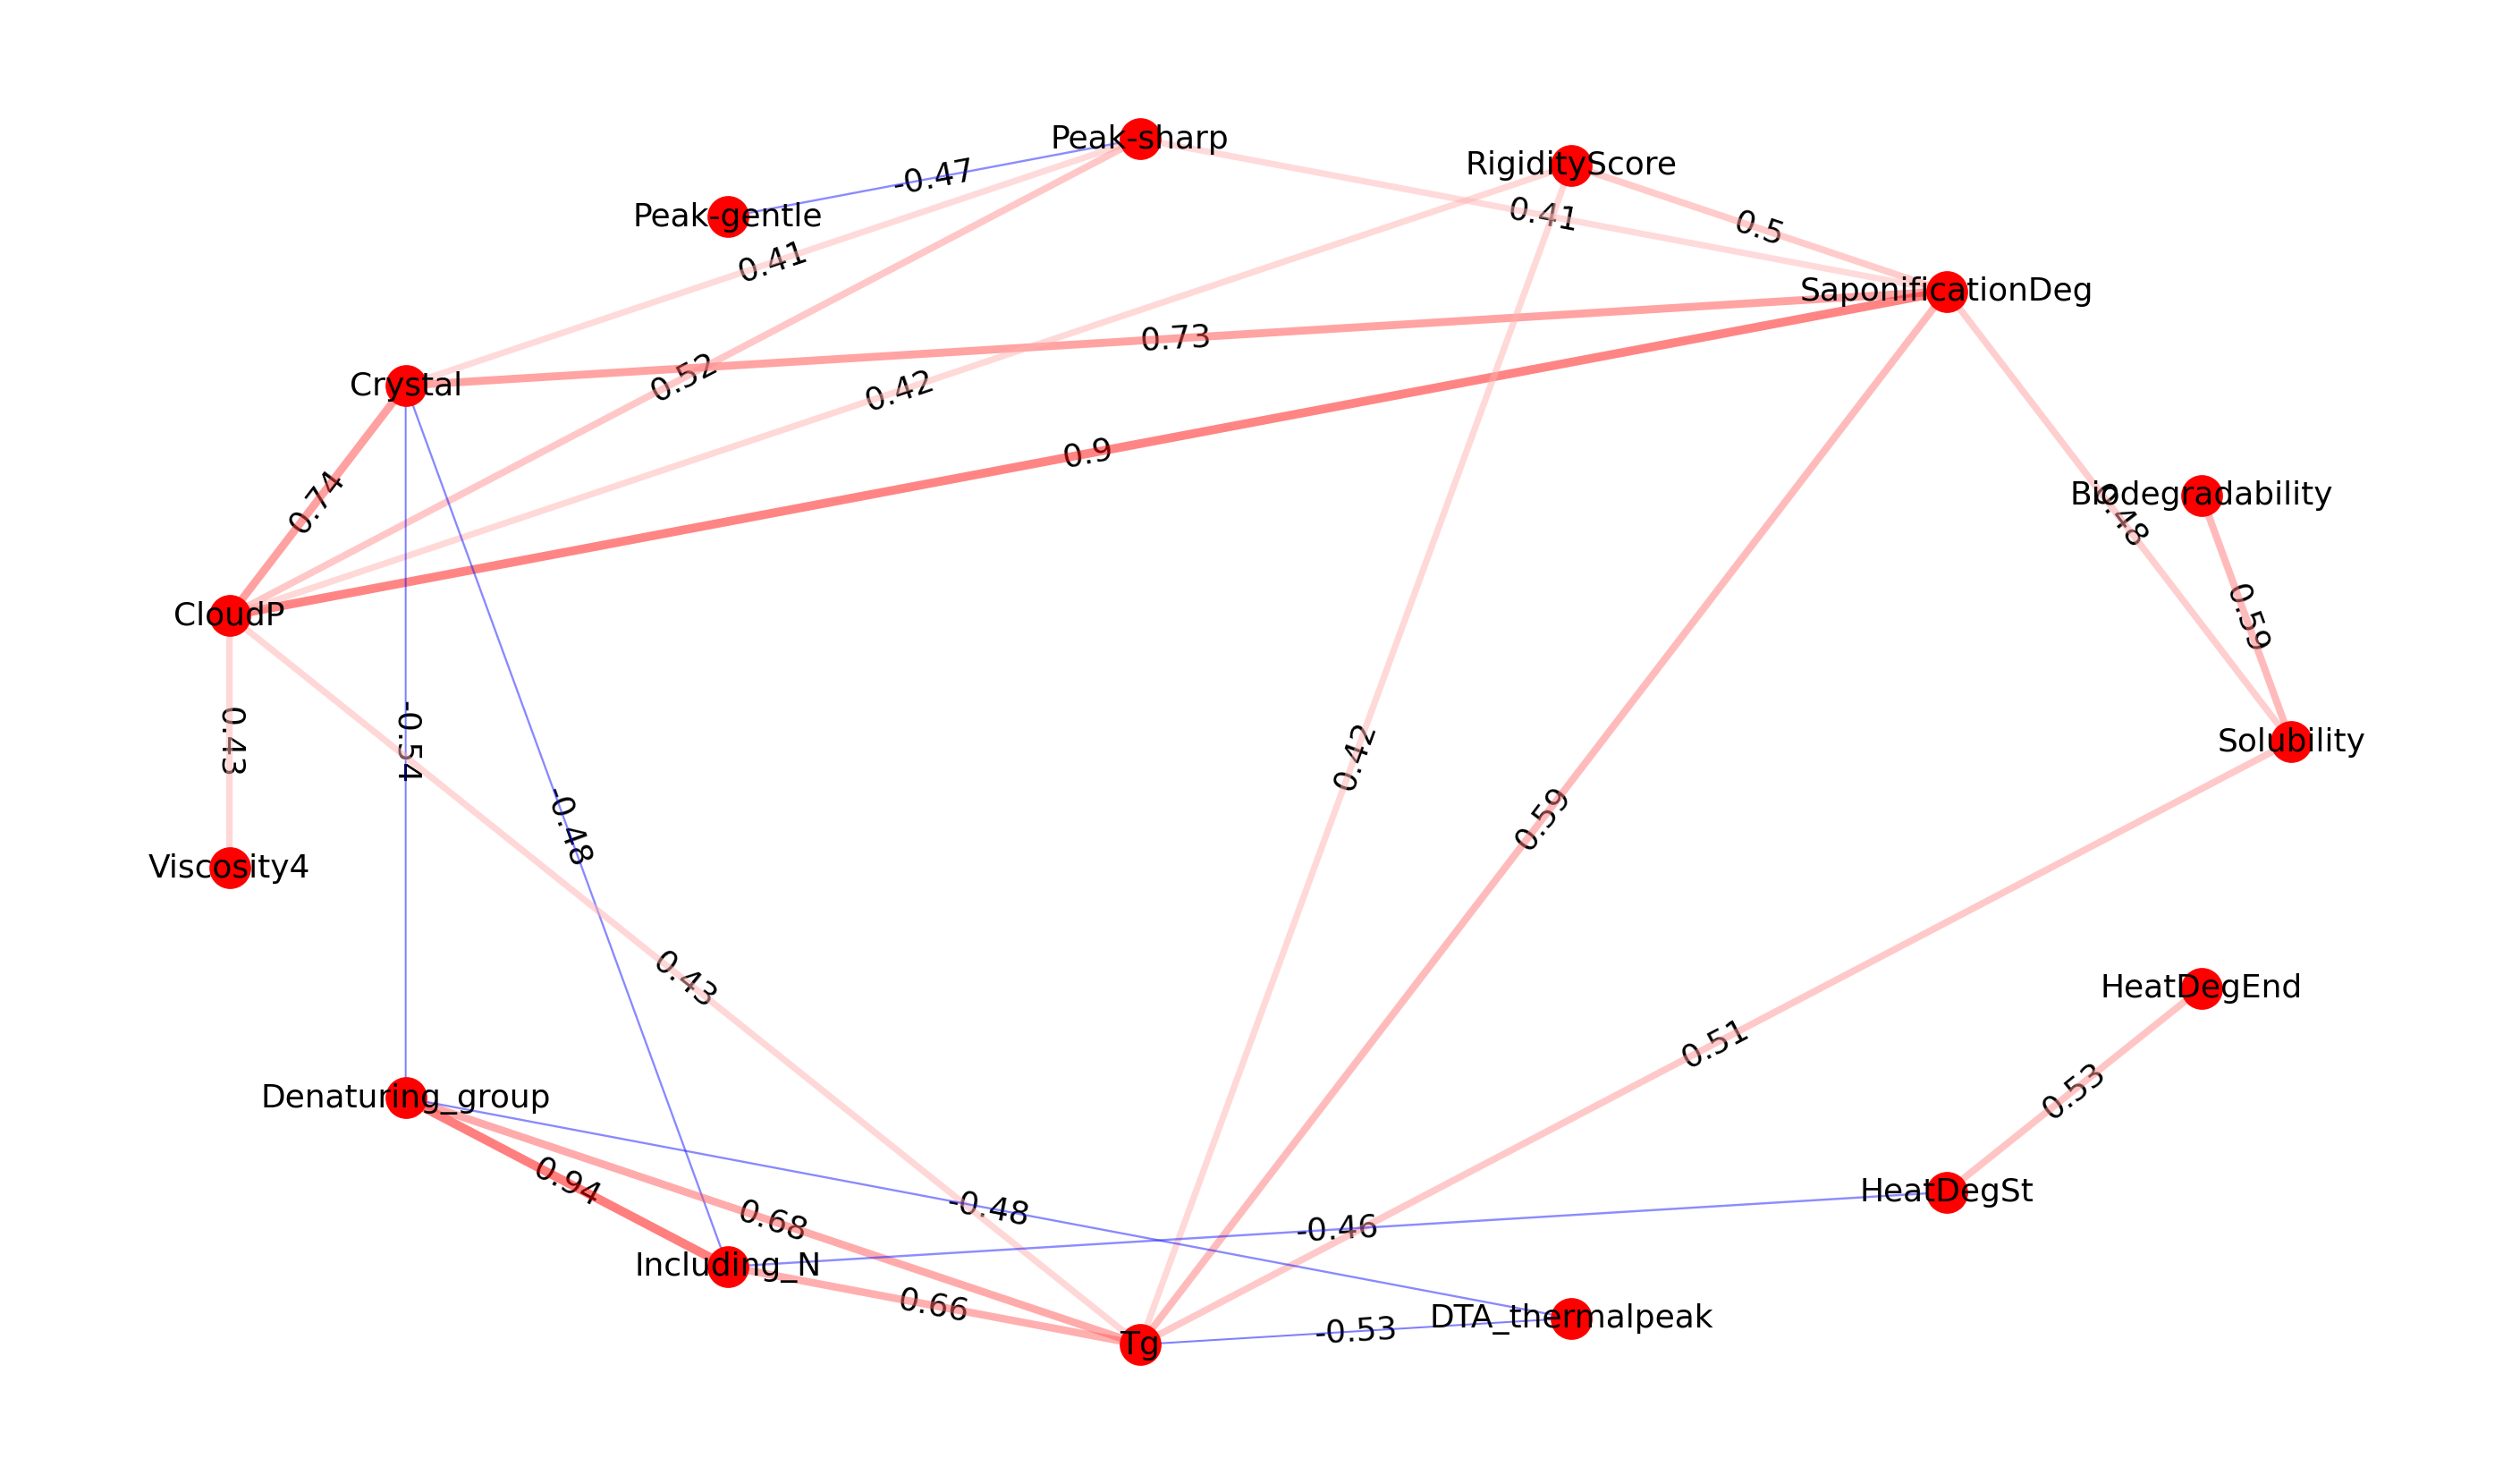

In [ ]:
import networkx as nx 
import matplotlib.pyplot as plt 
import matplotlib as mpl

#u = ['SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 
#    'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR', 'SNR'] 
#v = ['Intensity', 'FWHM', 'Area', 'Water+','Water-', 'Ccomp', 'Cstd', 'BF1', 
#    'D1', 'NS', 'O1', 'PROBHD', 'RG', 'SW', 'TD', 'TE', 'AT', 'calcSNR'] 
#w = [0.388, -0.085, 0.287, -0.162, 0.169, -0.034, -0.183, 0.380, 0.514, -0.260, 0.389, 0.276,0.079, 0.490, 0.436, -0.137, 0.002, -0.072] 
u=edges_lists["source"]
v=edges_lists["target"]
w=np.round(edges_lists["weight"], 2)#edges_lists["weight"]

G = nx.DiGraph() 
for ui, vi, wi in  zip(u, v, w): 
    G.add_edges_from([(ui, vi)], weight=wi) 
pos = nx.circular_layout(G)#.spring_layout(G, k=0.3)#.circular_layout(G) 
edge_labels = dict([((u, v,), d['weight']) for u, v, d in G.edges(data=True)]) 
weights = [G[u][v]['weight'] for u, v in G.edges()] 
weights = list(map(lambda x: (x - min(weights))/
        (max(weights) - min(weights)), weights)) 
weights = list(map(lambda x: (x * 4) + 1, weights)) 
i = 0 
for u, v in G.edges(): 
    #print(u, v, G[u][v]['weight'], weights[i]) 
    i += 1 

fig = plt.figure(figsize=(25, 15)) 

plt.axis('off') 
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,font_size=18) 
nx.draw_networkx_nodes(G, pos, 
         nodelist=G.nodes(), 
         node_color='r', 
         node_size=500)
edge_col = weights
nx.draw_networkx_edges(G, pos, 
         edgelist=G.edges(), 
         alpha=0.5, edge_cmap=plt.cm.bwr, edge_color=weights, width=weights, arrows=None, arrowstyle="-") 
nx.draw_networkx_labels(G, pos, font_size=18, font_color='black') 



ax = plt.gca()
ax.set_axis_off()
plt.savefig("network20230315.png")
plt.show()
nx.write_gml(G, "network20230315.gml")

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# yyplot 作成関数
def yyplot(y_obs, y_pred):
    yvalues = np.concatenate([y_obs.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_obs, y_pred,
            label='RMSE : %.3f, MAE : %.3f \n RMSE/MAE = %.3f'%(mean_squared_error(y_obs, y_pred)**0.5, mean_absolute_error(y_obs, y_pred),
                mean_squared_error(y_obs, y_pred)**0.5 / mean_absolute_error(y_obs, y_pred)))
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.legend(fontsize=12, loc='upper left')
    plt.savefig("yyplot_"+os.path.basename(file).split(".", 1)[0]+".png")
    plt.show()

    return fig

import numpy as np
import matplotlib.pyplot as plt

def plot_sorted_bar(figsize: tuple, x: np.array, y: np.array, title: str = None) -> None:
    """
    入力値を降順ソートして棒グラフを作成するメソッド。

    Parameters
    ----------
    figsize : tuple
        figsizeのtuple。
    x : np.numpy
        横軸(ラベル)。
    y : np.numpy
        縦軸(数値)。
    title : str
        グラフタイトル文字列。

    """
    # yを昇順ソート後、逆順にindexを取得
    sorted_index = np.argsort(y)[:]
    # 棒グラフの可視化
    plt.figure(figsize=figsize)
    plt.barh(
        #ラベルが数値だと自動ソートされるため、x軸は文字列型にしておく
        x[sorted_index].astype('str'),
        np.sort(y)[:]
    )
    plt.ylabel('Features',fontsize=18)
    plt.xlabel('Importance',fontsize=18)
    if title is not None:
        plt.title(title)
    plt.savefig("Importance_"+os.path.basename(file).split('.', 1)[0]+".png")

def remove_any_zero_row(df):
    """一つでも0の行を削除"""
    df = df.copy()
    for row in df.index:
        if (df.loc[row] == 0).any():
            df.drop(row, axis=0, inplace=True)
    return df

./data/RFdataset20230314.csv
RFdataset20230314
Best params: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 7}
Best Score: 0.13333333333333344
1.0
1.0
RMSE 学習: 0.00, テスト: 0.00
R^2 学習: 1.00, テスト: 1.00


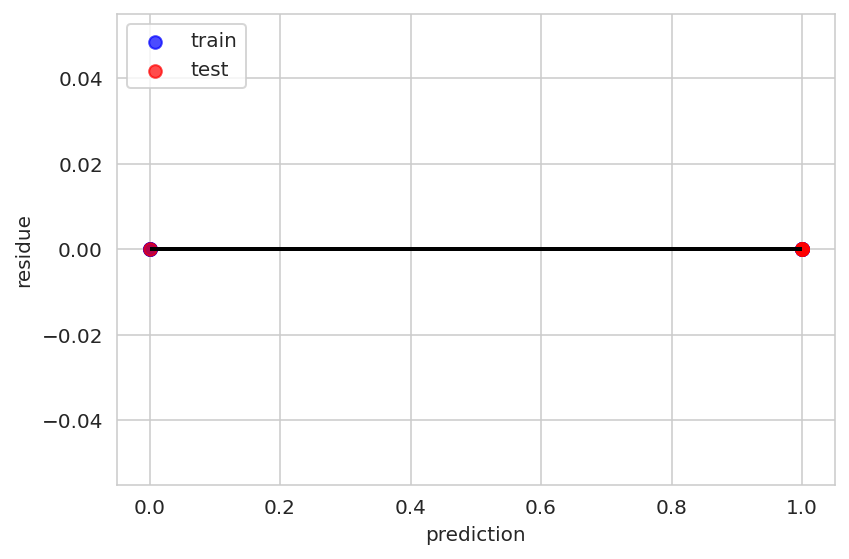

<ipython-input-12-b110d5dad6e6>:12: RuntimeWarning: invalid value encountered in double_scalars


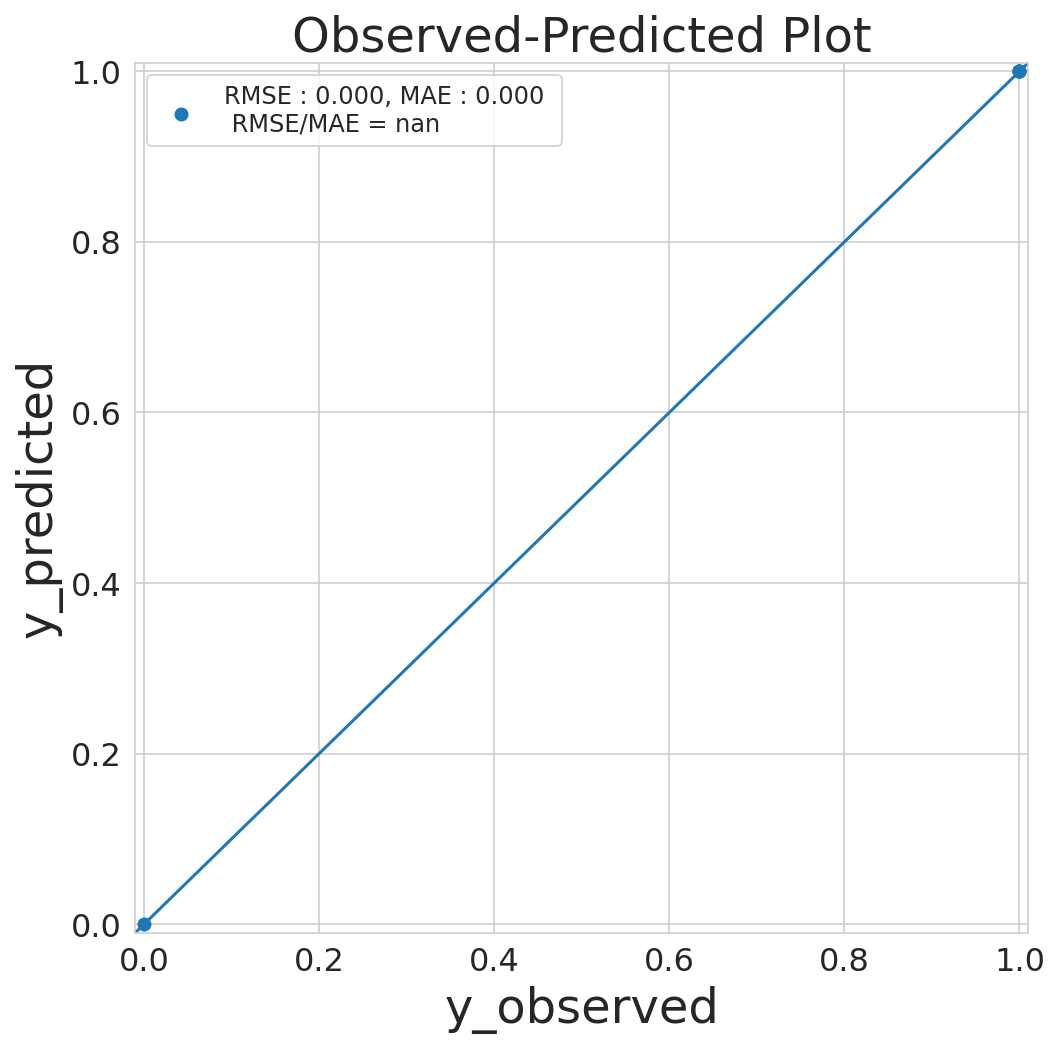

before
                    x         y
0          Solubility  0.061073
1   SaponificationDeg  0.054422
2       RigidityScore  0.032149
3         Peak-gentle  0.002886
4          Peak-sharp  0.000000
5             Crystal  0.042386
6          Viscosity4  0.027211
7              CloudP  0.217472
8    Denaturing_group  0.113832
9         Including_N  0.000000
10                 Tg  0.108225
11    DTA_thermalpeak  0.115797
12          HeatDegSt  0.096641
13         HeatDegEnd  0.127905
after
                    x         y
0          Solubility  0.061073
1   SaponificationDeg  0.054422
2       RigidityScore  0.032149
3         Peak-gentle  0.002886
5             Crystal  0.042386
6          Viscosity4  0.027211
7              CloudP  0.217472
8    Denaturing_group  0.113832
10                 Tg  0.108225
11    DTA_thermalpeak  0.115797
12          HeatDegSt  0.096641
13         HeatDegEnd  0.127905


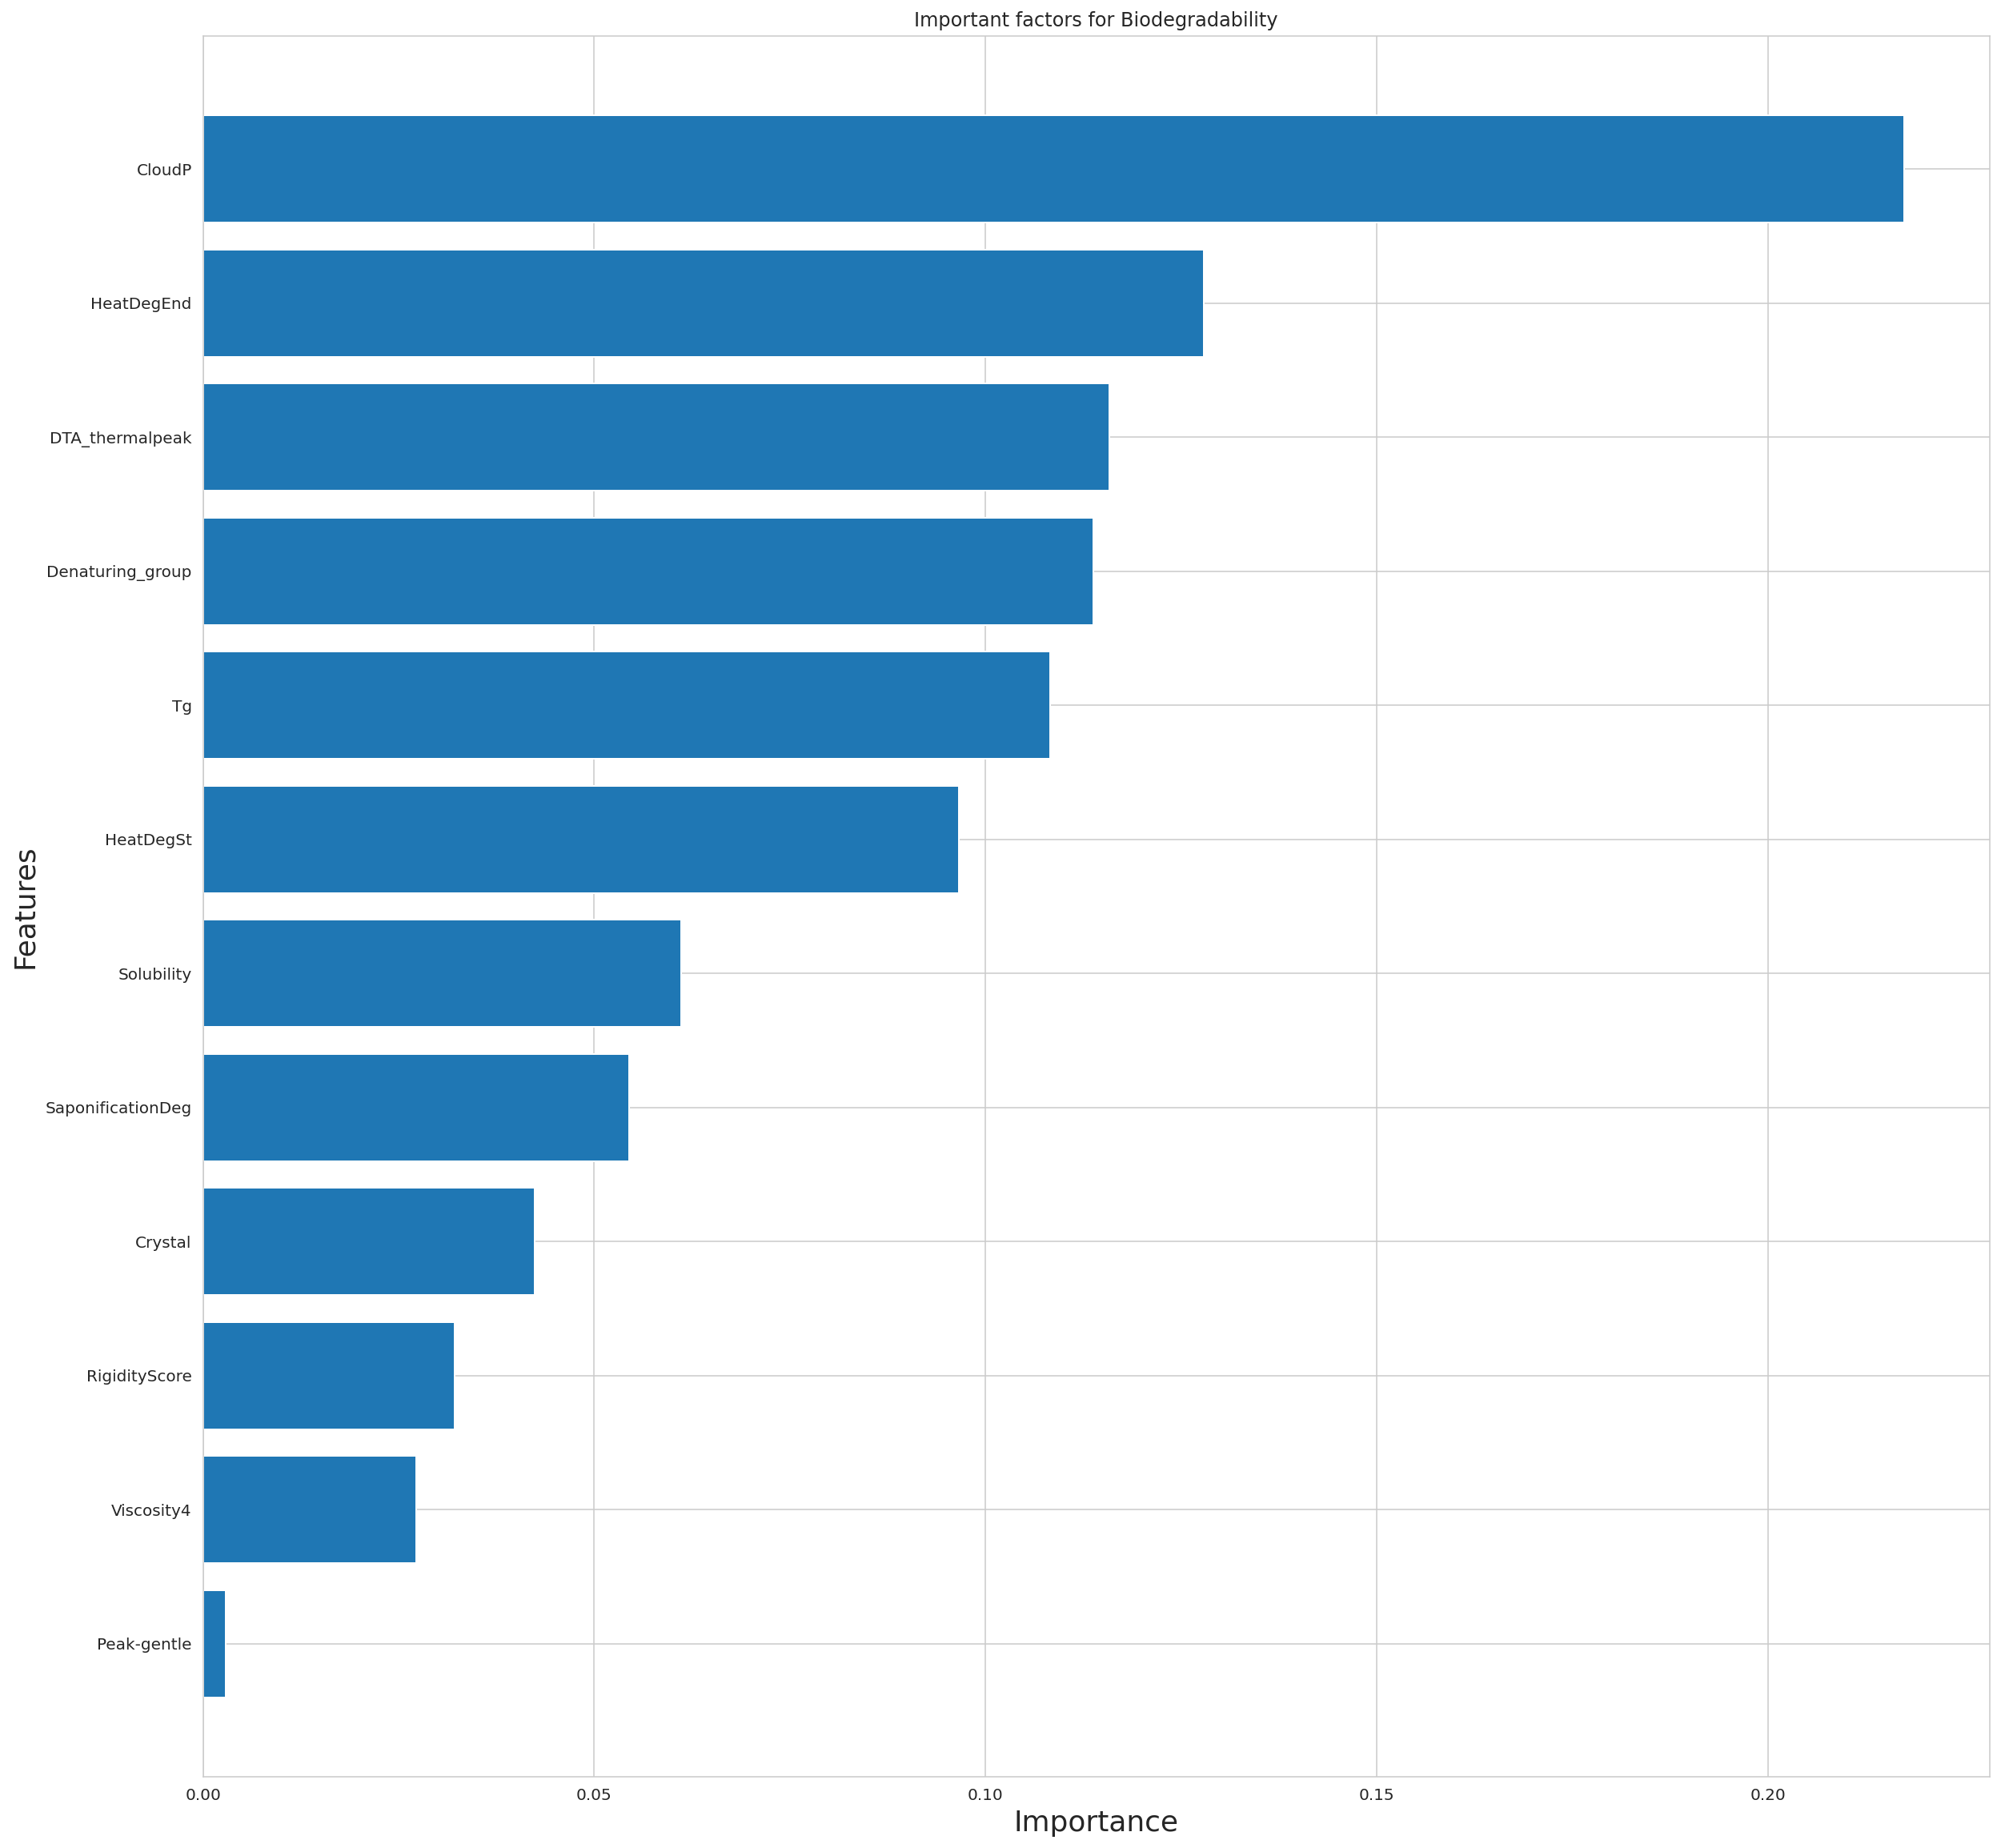

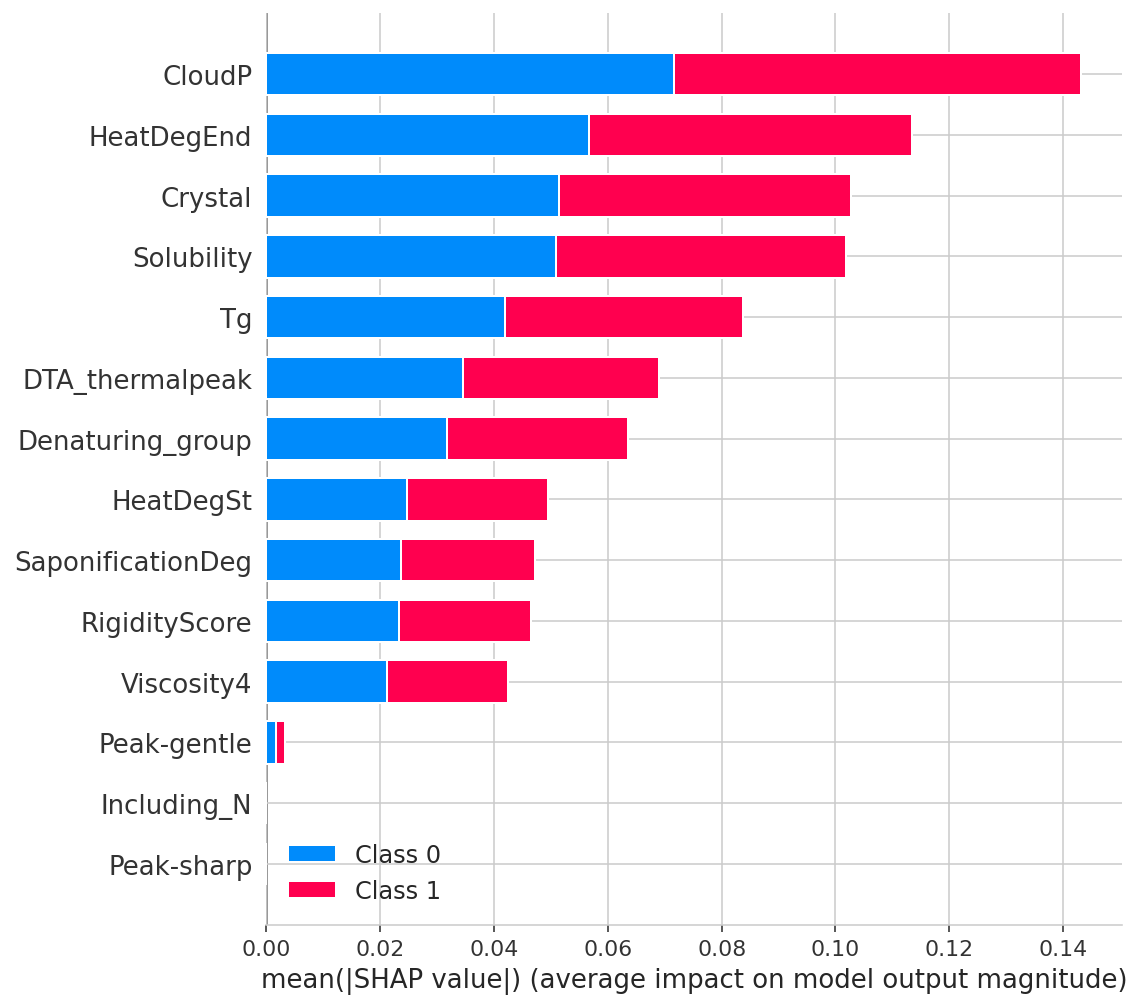

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
import scipy.stats

sns.set_style('whitegrid',{'linestyle.grid':'--'})
%matplotlib inline

import glob
files = glob.glob("./data/*")
for file in files:
    print(file)
    print(os.path.basename(file).split('.', 1)[0])
    from scipy import stats
    df = pd.read_csv(file, index_col=0)
    #df = df.apply(stats.zscore, axis=1)

    # 説明変数と目的変数
    X=df.iloc[:,1:]#data.data
    y=df.iloc[:,0]#data.target

    # 訓練データ(train)と検証データ(test)にわける 
    X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.2,random_state=42)

    X_train = np.array(X_train,dtype=int)
    X_test = np.array(X_test,dtype=int)
    y_train = np.array(y_train,dtype=int)
    y_test = np.array(y_test,dtype=int)

    from sklearn.ensemble        import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split

    # 学習データ＆テストデータ分割
    #X_train, X_test,  Y_train, Y_test = train_test_split(dataset[features_reg],dataset[target_reg],test_size=0.3, random_state=3)

    # グリッドサーチによるハイパーパラメータ探索候補設定
    # 今回はRandomForestClassifierのパラメータが対象(値は任意に設定)
    parameters = {  
        'n_estimators': [3,4,5,6,7,8,9,10, 20, 30, 50, 100],     # 用意する決定木モデルの数
        'max_features': ('sqrt', 'log2',None),  # ランダムに指定する特徴量の数
        'max_depth':    (3,5,10,15,25,30,40,50,100, None),     # 決定木のノード深さの制限値
    }

    # モデルインスタンス
    model = RandomForestClassifier()#RandomForestRegressor()

    # ハイパーパラメータチューニング(グリッドサーチのコンストラクタにモデルと辞書パラメータを指定)
    gridsearch = GridSearchCV(estimator = model,        # モデル
                              param_grid = parameters,  # チューニングするハイパーパラメータ
                              scoring = "r2"      # スコアリング
                            )


    # 演算実行
    gridsearch.fit(X_train, y_train)

    # グリッドサーチの結果から得られた最適なパラメータ候補を確認
    print('Best params: {}'.format(gridsearch.best_params_)) 
    print('Best Score: {}'.format(gridsearch.best_score_))

    clf = RandomForestClassifier(n_estimators = gridsearch.best_params_['n_estimators'], # 用意する決定木モデルの数
                                  max_features = gridsearch.best_params_['max_features'], # ランダムに指定する特徴量の数
                                  max_depth    = gridsearch.best_params_['max_depth'],    # 決定木のノード深さの制限値
                                  criterion='gini',                                       # 不純度評価指標の種類(ジニ係数）
                                  min_samples_leaf = 1,                                   # 1ノードの深さの最小値
                                  random_state = 0,                                       # 乱数シード
                                  )


    # モデルの作成
    #clf = DecisionTreeClassifier(max_depth=3) 
    #from sklearn.tree import DecisionTreeRegressor
    #clf = DecisionTreeRegressor(random_state=0) 
    # モデルの学習
    clf.fit(X_train, y_train)
    

    # 評価
    print(clf.score(X_train,y_train))
    print(clf.score(X_test,y_test))
    
    from sklearn.metrics import r2_score            # 決定係数
    from sklearn.metrics import mean_squared_error  # RMSE

    # 予測値(Train）
    y_train_pred = clf.predict(X_train)

    # 予測値（Test)
    y_test_pred = clf.predict(X_test)

    # 平均平方二乗誤差(RMSE)
    print('RMSE 学習: %.2f, テスト: %.2f' % (
            mean_squared_error(y_train, y_train_pred, squared=False), # 学習
            mean_squared_error(y_test, y_test_pred, squared=False)    # テスト
          ))

    # 決定係数(R^2)
    print('R^2 学習: %.2f, テスト: %.2f' % (
            r2_score(y_train, y_train_pred), # 学習
            r2_score(y_test, y_test_pred)    # テスト
          ))
    
    # 予測値と残差をプロット（学習データ）
    plt.scatter(y_train_pred,             # グラフのx値(予測値)  
                y_train_pred - y_train,   # グラフのy値(予測値と学習値の差)
                c='blue',                 # プロットの色
                marker='o',               # マーカーの種類
                s=40,                     # マーカーサイズ
                alpha=0.7,                # 透明度
                label='train')         # ラベルの文字


    # 予測値と残差をプロット（テストデータ）
    plt.scatter(y_test_pred,            
                y_test_pred - y_test, 
                c='red',
                marker='o', 
                s=40,
                alpha=0.7,
                label='test')

    # グラフの書式設定
    plt.xlabel('prediction')
    plt.ylabel('residue')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=np.amin(y_test_pred), xmax=np.amax(y_test_pred), lw=2, color='black')
    #plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
    #plt.xlim([-20, 60])
    #plt.ylim([-50, 40])
    plt.tight_layout()
    plt.savefig("residue_"+os.path.basename(file).split('.', 1)[0]+".png")
    plt.show()

    # yyplot の実行例
    np.random.seed(0)
    y_obs = y_test#np.random.normal(size=(1000, 1))
    y_pred = y_test_pred#y_obs + np.random.normal(scale=0.3, size=(1000, 1))
    fig = yyplot(y_obs, y_pred)

    x = df.columns[1:] #特徴量名 ->['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
    y = clf.feature_importances_ #特徴量の重要度
    df0 = pd.DataFrame({'x':x,'y':y})
    print('before')
    print(df0)

    df0 = remove_any_zero_row(df0)

    print('after')
    print(df0)

    # 可視化
    plot_sorted_bar(
        figsize=(20, 20),
        x=df0["x"].values, 
        y=df0["y"].values,
        title='Important factors for '+df.columns[0]
    )

    plt.show()
    import shap
    explainer = shap.TreeExplainer(clf, data=X_train)
    X_train_shap_values = explainer.shap_values(X_train)
    shap.summary_plot(shap_values=X_train_shap_values,
                  features=X_train,
                  show=False,
                  feature_names=df.columns[1:])
    plt.savefig("shap.png"+os.path.basename(file).split('.', 1)[0]+".png") # 画像を保存
    plt.show()
    """
    import graphviz
    from sklearn.tree import export_graphviz
    from sklearn import tree
    dot = tree.export_graphviz(clf.estimators_[0], filled=True, rounded=True, 
                          #class_names=['setosa', 'versicolor', 'virginica'],
                          feature_names=df.columns[1:],
                          out_file=None) 

    graph = graphviz.Source(dot) #DOT記法をレンダリング
    #graph #グラフを出力
    # 画像を保存
    # 拡張子はいらない
    graph.render("Tree_"+os.path.basename(file).split('.', 1)[0])

    # 画像を表示
    graph.view()
    #features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
    #target_reg = "Age"

    #tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
    #tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)
    import dtreeviz
    viz_rmodel = dtreeviz.model(model=clf.estimators_[0], 
                                X_train=df.iloc[:,1:], 
                                y_train=df.iloc[:,0], 
                                feature_names=df.columns[1:], 
                                target_name=df.columns[0])
    viz_rmodel.view(orientation="LR")
    """



In [ ]:
dfX_train_shap_values = pd.DataFrame(X_train_shap_values[0])
dfX_train_shap_values.to_csv("shap0_20230315.csv")

In [ ]:
dfX_train_shap_values1 = pd.DataFrame(X_train_shap_values[1])
dfX_train_shap_values1.to_csv("shap1_20230315.csv")

In [ ]:
clf.classes_

array([0, 1])

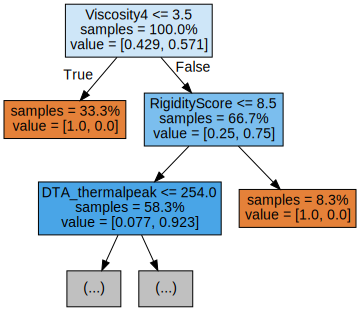

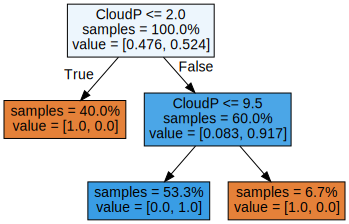

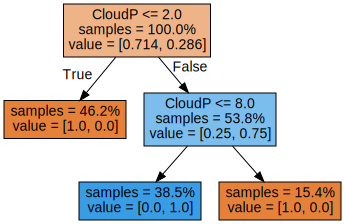

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=df.columns[1:],  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

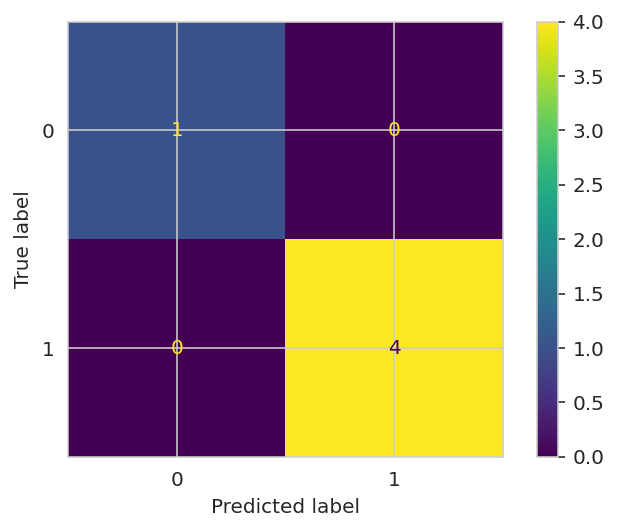

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions with the best model
#y_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
import sys
import os
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 6.9 MB/s eta 0:00:00


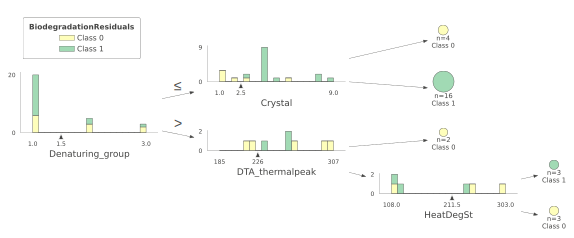

In [ ]:
    import graphviz
    from sklearn.tree import export_graphviz
    from sklearn import tree
    dot = tree.export_graphviz(clf.estimators_[0], filled=True, rounded=True, 
                          #class_names=['setosa', 'versicolor', 'virginica'],
                          feature_names=df.columns[1:],
                          out_file=None) 

    graph = graphviz.Source(dot) #DOT記法をレンダリング
    #graph #グラフを出力
    # 画像を保存
    # 拡張子はいらない
    graph.render("Tree_"+os.path.basename(file).split('.', 1)[0])

    # 画像を表示
    graph.view()
    #features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
    #target_reg = "Age"

    #tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
    #tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)
    import dtreeviz
    viz_rmodel = dtreeviz.model(model=clf.estimators_[0], 
                                X_train=df.iloc[:,1:], 
                                y_train=df.iloc[:,0], 
                                feature_names=df.columns[1:], 
                                target_name=df.columns[0])
    viz_rmodel.view(orientation="LR")

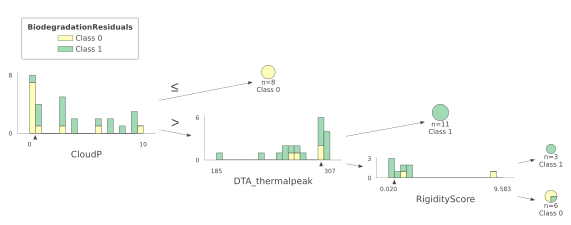

In [ ]:
    import graphviz
    from sklearn.tree import export_graphviz
    from sklearn import tree
    dot = tree.export_graphviz(clf.estimators_[1], filled=True, rounded=True, 
                          #class_names=['setosa', 'versicolor', 'virginica'],
                          feature_names=df.columns[1:],
                          out_file=None) 

    graph = graphviz.Source(dot) #DOT記法をレンダリング
    #graph #グラフを出力
    # 画像を保存
    # 拡張子はいらない
    graph.render("Tree_"+os.path.basename(file).split('.', 1)[0])

    # 画像を表示
    graph.view()
    #features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
    #target_reg = "Age"

    #tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
    #tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)
    import dtreeviz
    viz_rmodel = dtreeviz.model(model=clf.estimators_[1], 
                                X_train=df.iloc[:,1:], 
                                y_train=df.iloc[:,0], 
                                feature_names=df.columns[1:], 
                                target_name=df.columns[0])
    viz_rmodel.view(orientation="LR")

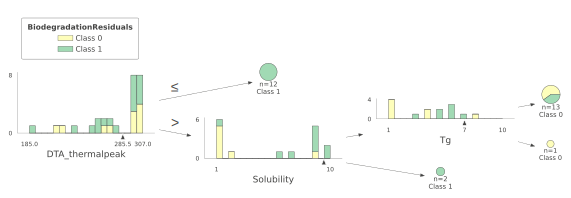

In [ ]:
    import graphviz
    from sklearn.tree import export_graphviz
    from sklearn import tree
    dot = tree.export_graphviz(clf.estimators_[2], filled=True, rounded=True, 
                          #class_names=['setosa', 'versicolor', 'virginica'],
                          feature_names=df.columns[1:],
                          out_file=None) 

    graph = graphviz.Source(dot) #DOT記法をレンダリング
    #graph #グラフを出力
    # 画像を保存
    # 拡張子はいらない
    graph.render("Tree_"+os.path.basename(file).split('.', 1)[0])

    # 画像を表示
    graph.view()
    #features_reg = ["Pclass", "Fare", "Sex_label", "Cabin_label", "Embarked_label", "Survived"]
    #target_reg = "Age"

    #tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=random_state, criterion="absolute_error")
    #tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)
    import dtreeviz
    viz_rmodel = dtreeviz.model(model=clf.estimators_[2], 
                                X_train=df.iloc[:,1:], 
                                y_train=df.iloc[:,0], 
                                feature_names=df.columns[1:], 
                                target_name=df.columns[0])
    viz_rmodel.view(orientation="LR")

In [ ]:
import shap
explainer = shap.TreeExplainer(clf, data=X_train)
X_train_shap_values = explainer.shap_values(X_train)

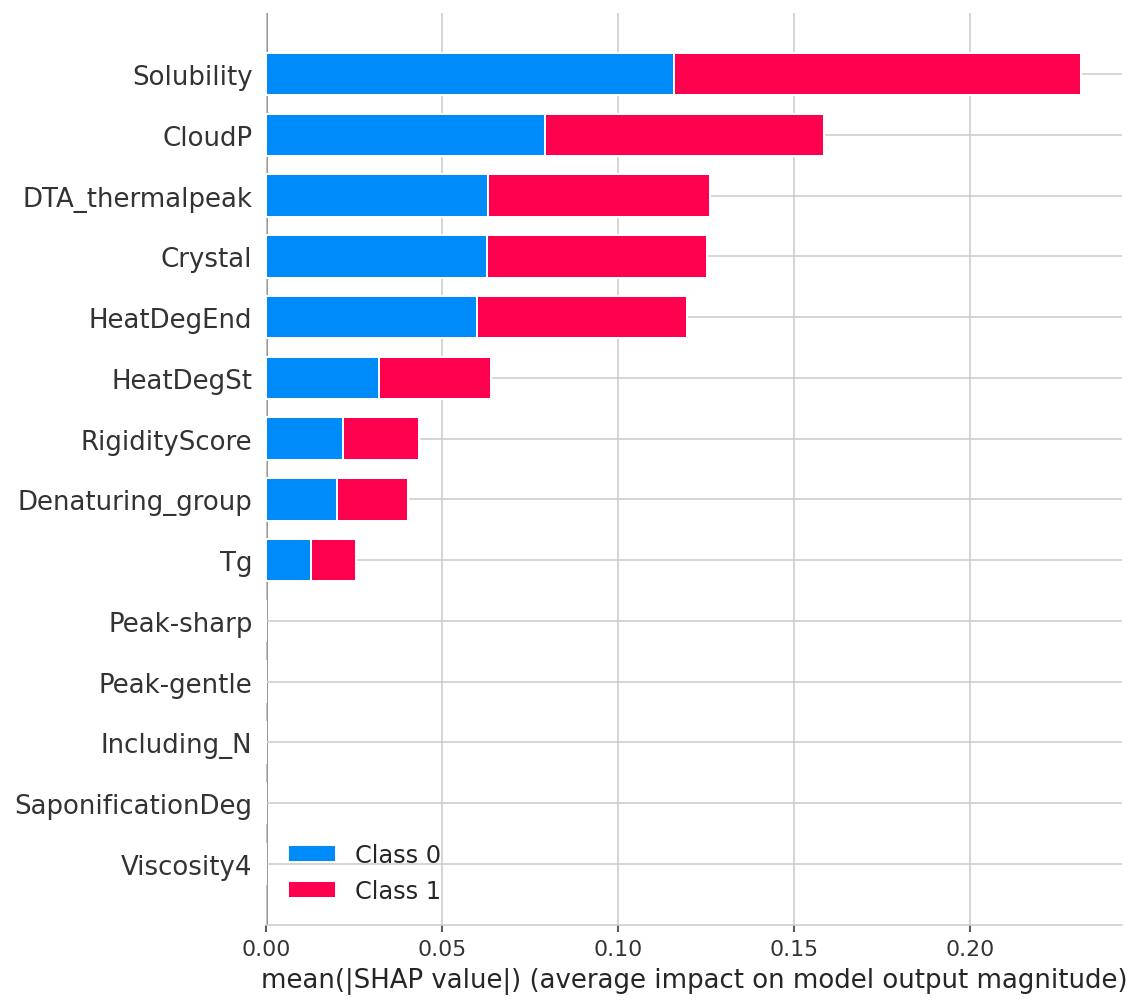

In [ ]:
shap.summary_plot(shap_values=X_train_shap_values,
                  features=X_train,
                  feature_names=df.columns[1:])
#どのクラス を予測するにせよ、crystal,Tg,solubilityが大きく影響しているということが読み取れます。

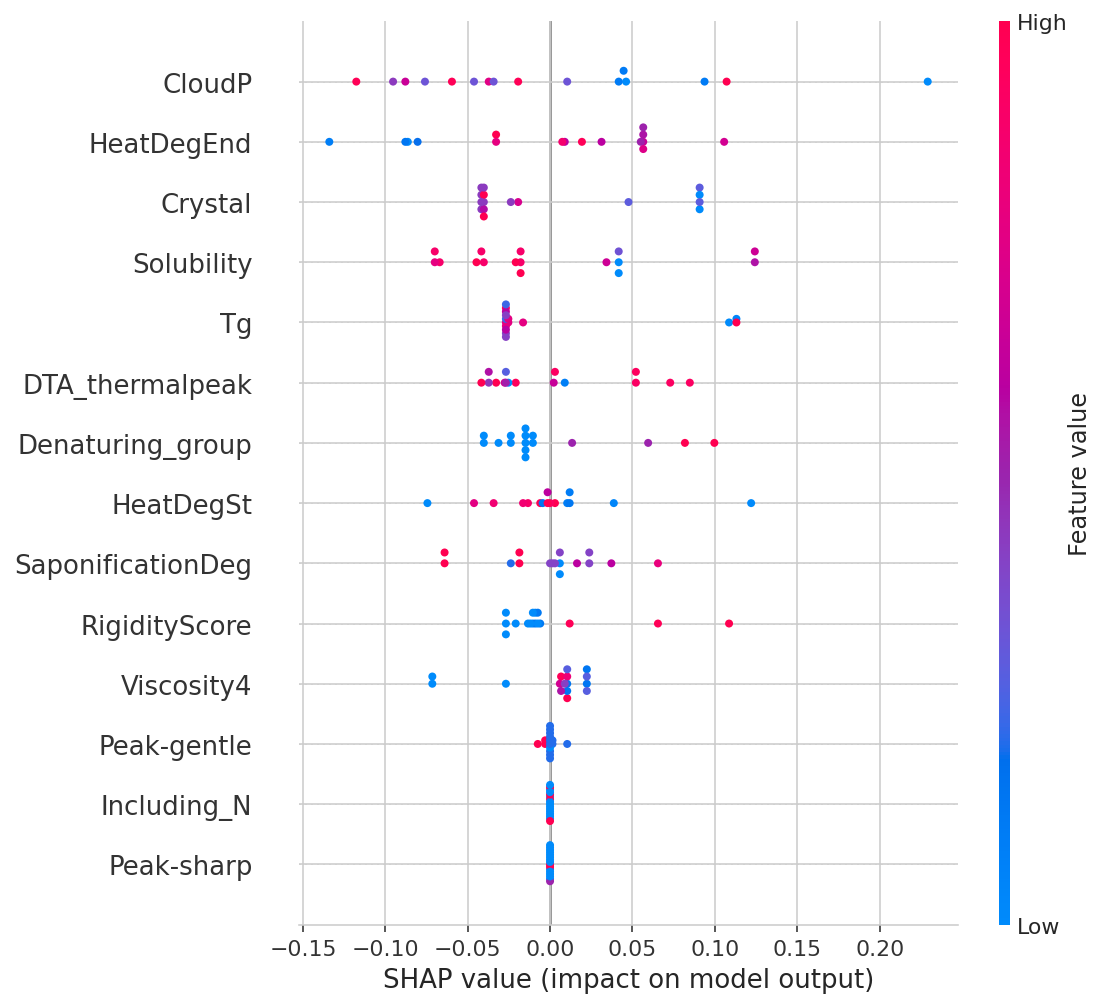

In [ ]:
shap.summary_plot(shap_values=X_train_shap_values[0],
                  features=X_train,
                  plot_type="dot", #又はviolin
                                    feature_names=df.columns[1:]
                  )

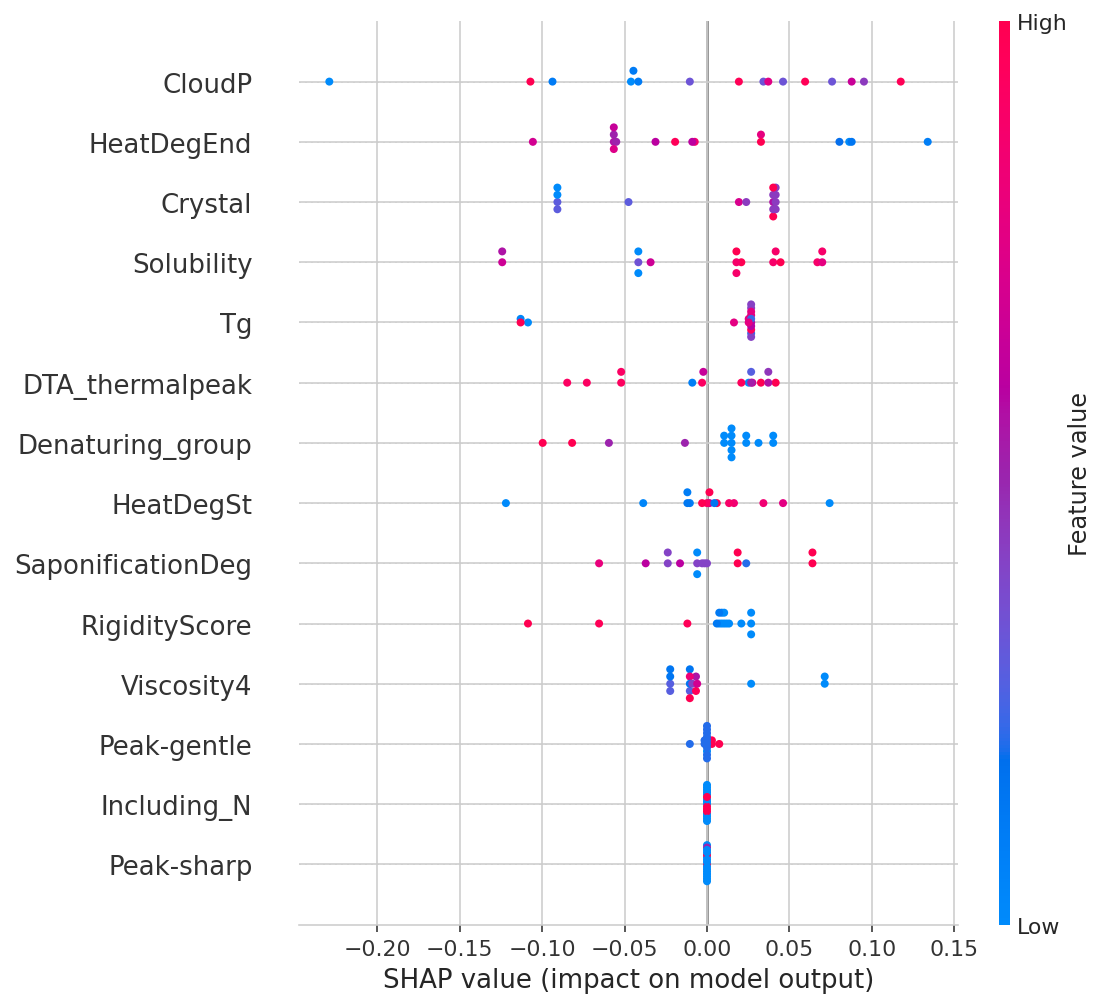

In [ ]:
shap.summary_plot(shap_values=X_train_shap_values[1],
                  features=X_train,
                  plot_type="dot", #又はviolin
                                    feature_names=df.columns[1:]
                  )

Class  0


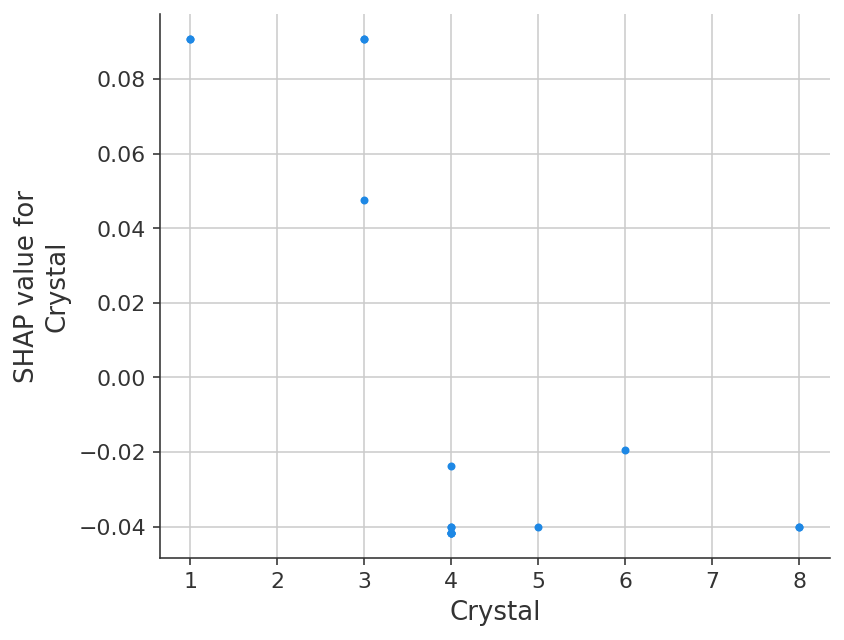

Class  1


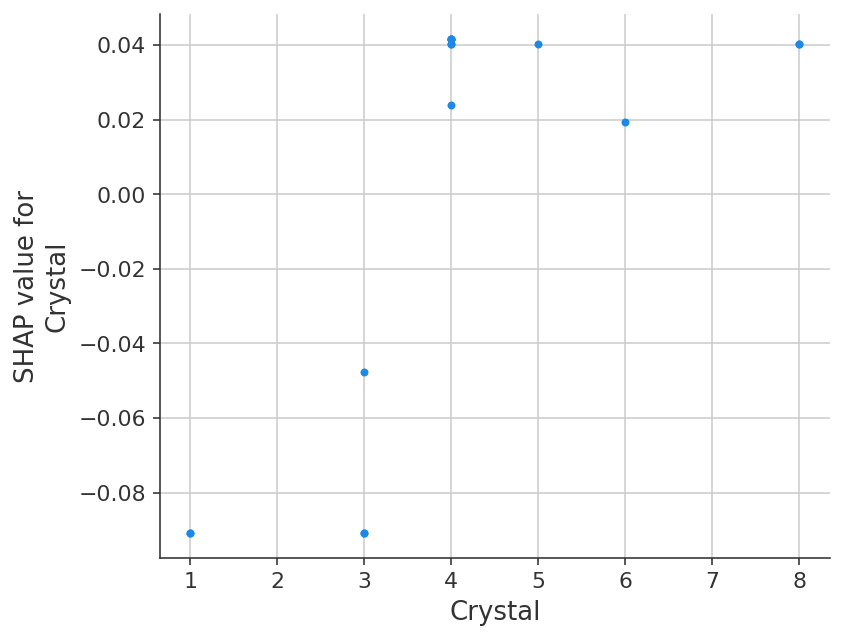

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(ind="Crystal",
                         interaction_index=None,
                         shap_values=X_train_shap_values[i],
                         features=X_train,
                                    feature_names=df.columns[1:]
                         )

Class  0


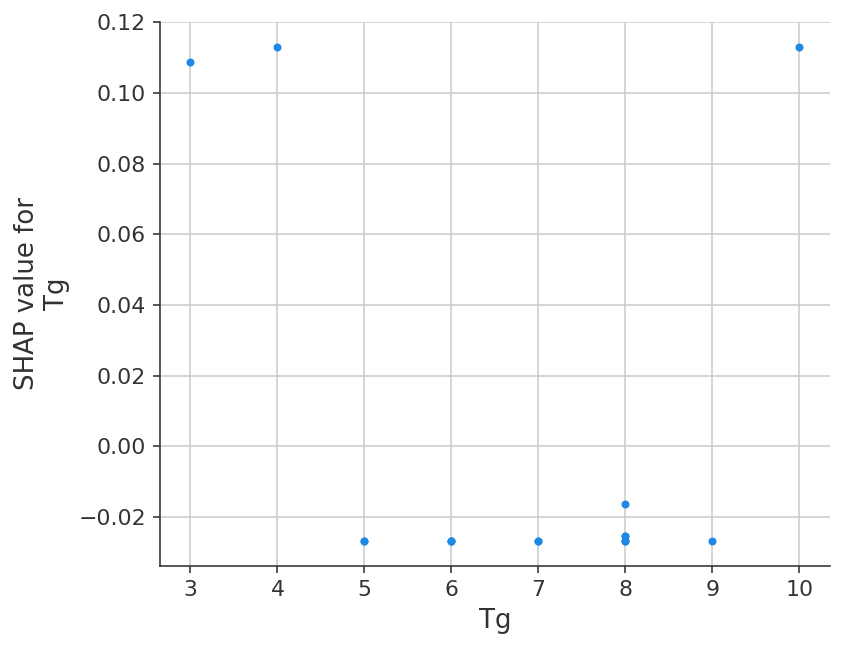

Class  1


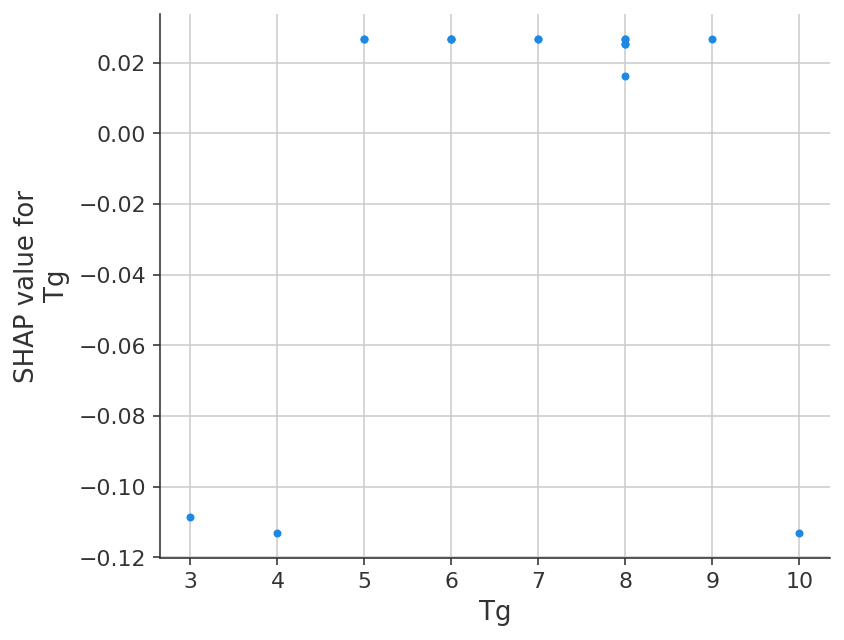

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(ind="Tg",
                         interaction_index=None,
                         shap_values=X_train_shap_values[i],
                         features=X_train,
                                    feature_names=df.columns[1:]
                         )

Class  0


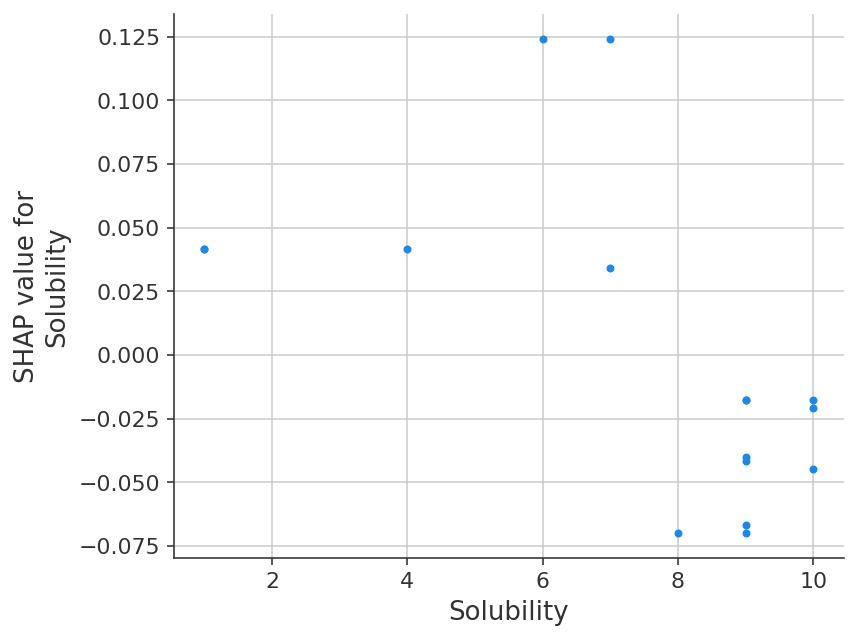

Class  1


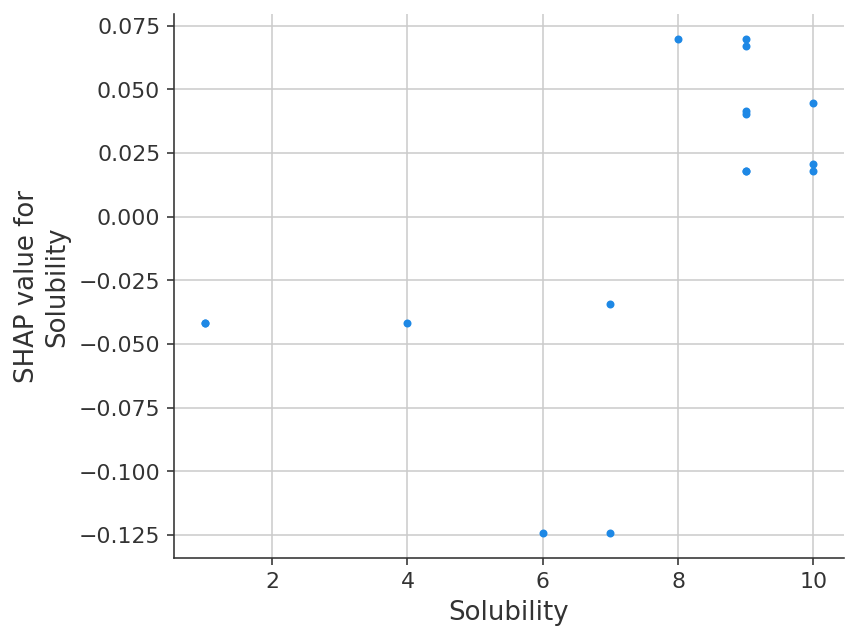

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(ind="Solubility",
                         interaction_index=None,
                         shap_values=X_train_shap_values[i],
                         features=X_train,
                                    feature_names=df.columns[1:]
                         )

Class  0


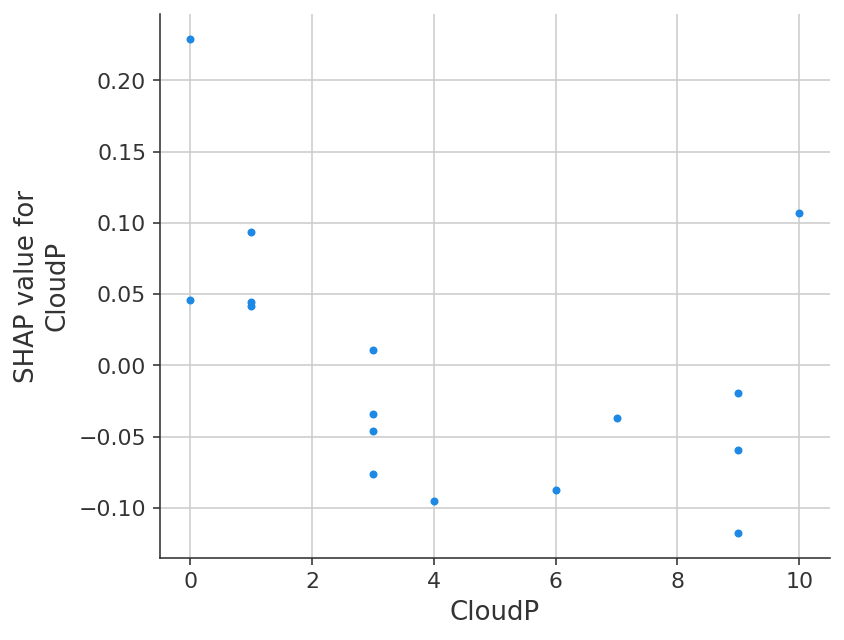

Class  1


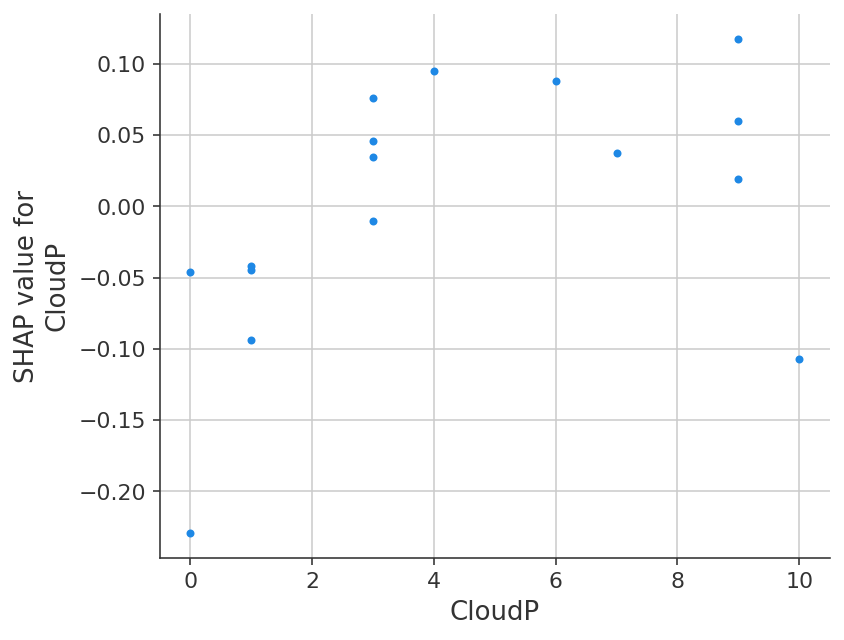

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(ind="CloudP",
                         interaction_index=None,
                         shap_values=X_train_shap_values[i],
                         features=X_train,
                                    feature_names=df.columns[1:]
                         )

Class  0


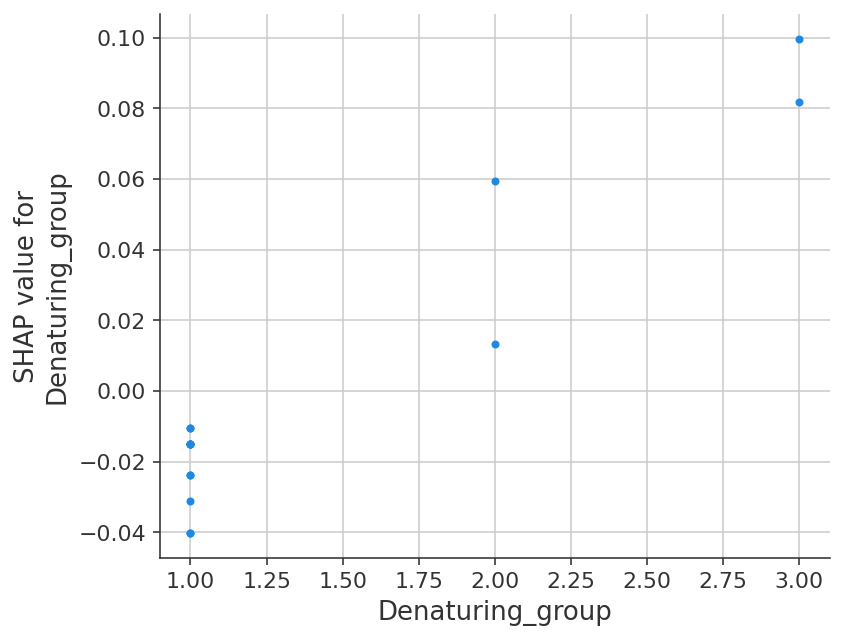

Class  1


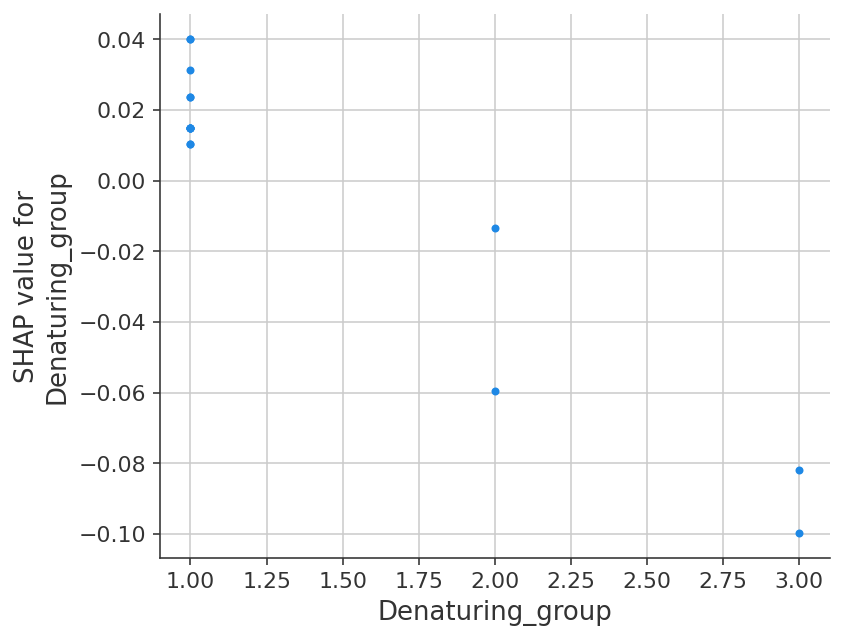

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(ind="Denaturing_group",
                         interaction_index=None,
                         shap_values=X_train_shap_values[i],
                         features=X_train,
                                    feature_names=df.columns[1:]
                         )

Class  0


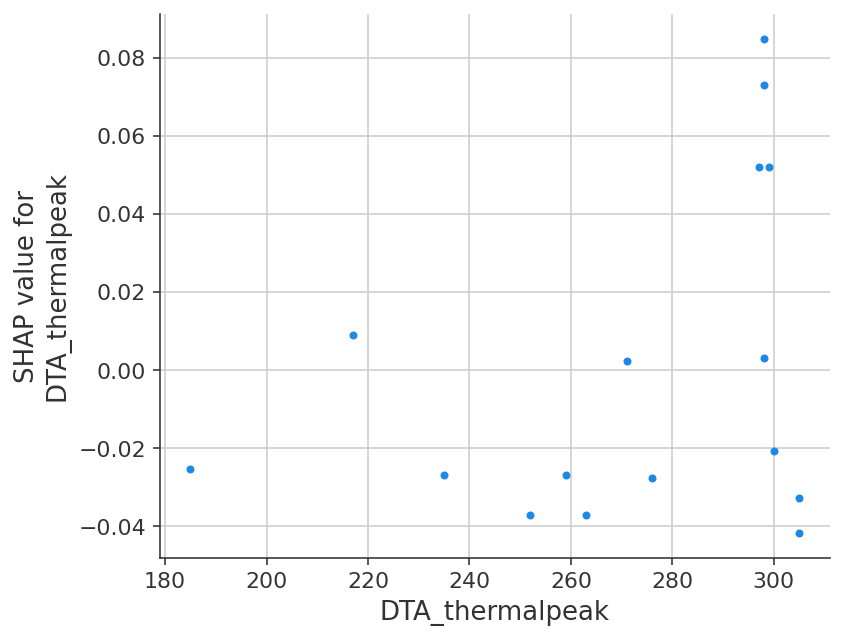

Class  1


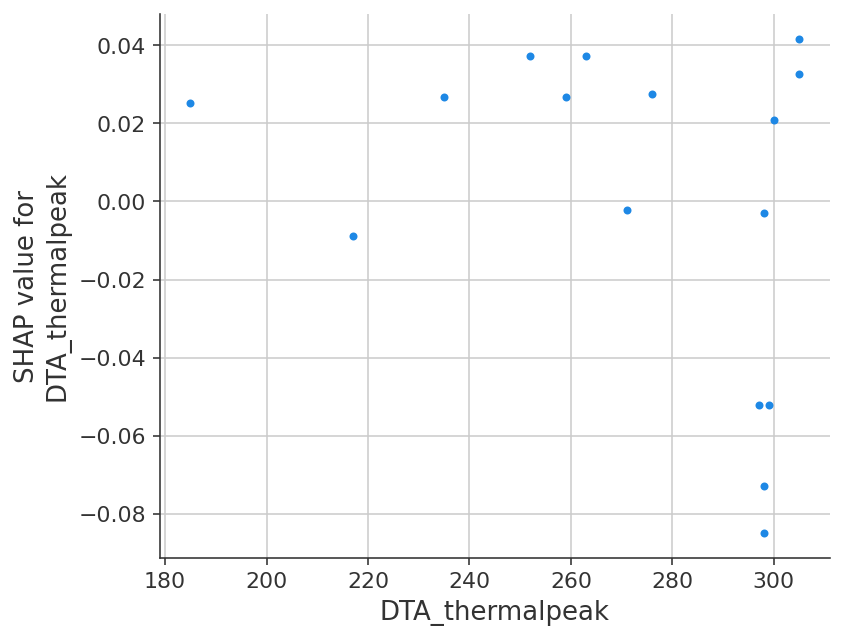

In [ ]:
for i in range(2):
    print("Class ", i)
    shap.dependence_plot(ind="DTA_thermalpeak",
                         interaction_index=None,
                         shap_values=X_train_shap_values[i],
                         features=X_train,
                                    feature_names=df.columns[1:]
                         )